In [74]:
# Data Handling
import numpy as np
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split

# Regression Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

# Model Evaluation Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [75]:
df = pd.read_excel('premiums_rest.xlsx')
print(df.shape)

(29904, 13)


In [76]:
df.head(3)

,Age,Gender,Region,Marital_status,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164


In [77]:
df.columns

Index(['Age', 'Gender', 'Region', 'Marital_status', 'Number Of Dependants',
       'BMI_Category', 'Smoking_Status', 'Employment_Status', 'Income_Level',
       'Income_Lakhs', 'Medical History', 'Insurance_Plan',
       'Annual_Premium_Amount'],
      dtype='object')

#### Removing, Like there is some of variables/Features having white spaces

In [78]:
df.columns = df.columns.str.replace(' ', '_').str.lower()
# df.columns = df.columns.str.strip().str.lower().str.replace(r'\s+', '_', regex=True)

In [79]:
df.head()

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,Gold,20303
4,56,Male,Northeast,Married,3,Obesity,Occasional,Self-Employed,10L - 25L,14,Diabetes,Bronze,15610


### Checking Null Values in Data and Dropping these Values

In [80]:
df.isnull().sum()

age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           9
employment_status        1
income_level             9
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
dtype: int64

In [81]:
df.dropna(inplace = True)
df.isnull().sum()

age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           0
employment_status        0
income_level             0
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
dtype: int64

In [82]:
df.shape

(29886, 13)

In [83]:
df.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount
count,29886.000000,29886.000000,29886.000000,29886.000000
mean,43.396105,2.379910,23.364184,20892.303821
std,13.412657,1.431201,24.740339,6936.813440
min,26.000000,-3.000000,1.000000,3625.000000
25%,34.000000,1.000000,7.000000,15697.250000
50%,42.000000,3.000000,17.000000,20489.000000
75%,52.000000,3.000000,32.000000,26360.000000
max,356.000000,5.000000,930.000000,43471.000000


In [84]:
df[df.number_of_dependants<0]['number_of_dependants'].unique()

array([-1, -3], dtype=int64)

In [85]:
df['number_of_dependants'] = abs(df['number_of_dependants'])
df.number_of_dependants.describe()

count    29886.000000
mean         2.385933
std          1.421137
min          0.000000
25%          1.000000
50%          3.000000
75%          3.000000
max          5.000000
Name: number_of_dependants, dtype: float64

In [86]:
numeric_col = df.select_dtypes(['float64', 'int64']).columns
numeric_col

Index(['age', 'number_of_dependants', 'income_lakhs', 'annual_premium_amount'], dtype='object')

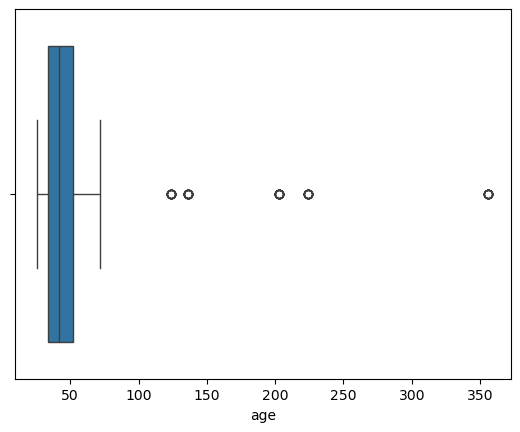

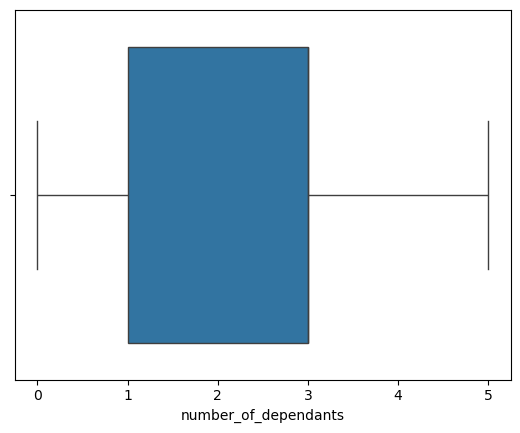

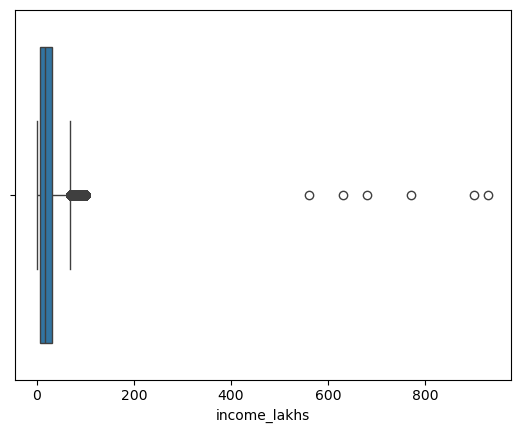

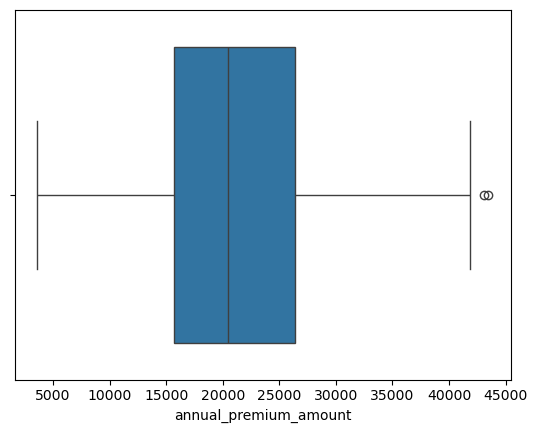

In [87]:
for c in  numeric_col:
    sns.boxplot(x = df[c])
    plt.show()

### Lets start outliers Treatment

In [88]:
df[df.age>100]['age'].describe()

count     58.000000
mean     198.051724
std       78.321968
min      124.000000
25%      136.000000
50%      203.000000
75%      224.000000
max      356.000000
Name: age, dtype: float64

In [89]:
df1 = df[df.age<=100].copy()
df1.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount
count,29828.000000,29828.000000,29828.000000,29828.000000
mean,43.095380,2.387790,23.371530,20901.900563
std,11.041991,1.420641,24.751262,6928.457636
min,26.000000,0.000000,1.000000,6538.000000
25%,34.000000,1.000000,7.000000,15706.000000
50%,42.000000,3.000000,17.000000,20496.000000
75%,52.000000,3.000000,32.000000,26361.000000
max,72.000000,5.000000,930.000000,43471.000000


In [90]:
def getting_iqr_bounds(col):
    Q1, Q3 = col.quantile([0.25, 0.75])
    IQR = Q3-Q1
    lower_bound = Q1-1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

In [91]:
getting_iqr_bounds(df1.income_lakhs)

(-30.5, 69.5)

In [92]:
quantile_thresold = df1.income_lakhs.quantile(0.999)
quantile_thresold

100.0

In [93]:
df2 = df1[df1.income_lakhs<= quantile_thresold].copy()
df2.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount
count,29822.000000,29822.000000,29822.000000,29822.000000
mean,43.094896,2.387734,23.226343,20900.689223
std,11.042430,1.420644,22.455408,6928.192115
min,26.000000,0.000000,1.000000,6538.000000
25%,34.000000,1.000000,7.000000,15705.250000
50%,42.000000,3.000000,17.000000,20495.500000
75%,52.000000,3.000000,32.000000,26360.000000
max,72.000000,5.000000,100.000000,43471.000000


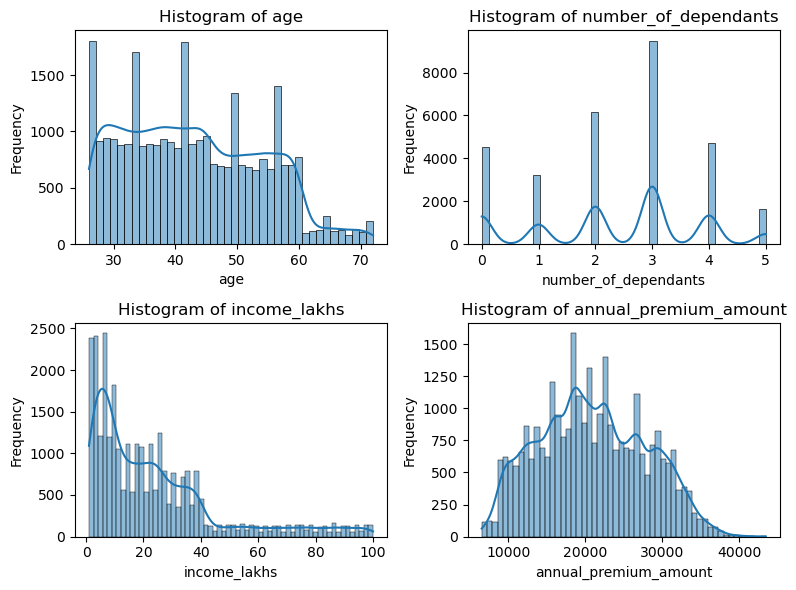

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming numeric_col is a list of numeric columns in df2
num_cols = len(numeric_col)  # Number of numeric columns
fig, axes = plt.subplots(2, 2, figsize=(8, 6))  # Create a 2x2 grid of subplots
axes = axes.ravel()  # Flatten the 2x2 grid into a 1D array for easy iteration

# Loop through each numeric column and plot
for i, col in enumerate(numeric_col):
    sns.histplot(df2[col], kde=True, ax=axes[i])  # Plot on the i-th subplot
    axes[i].set_title(f'Histogram of {col}')  # Add a title
    axes[i].set_xlabel(col)  # Label the x-axis
    axes[i].set_ylabel('Frequency')  # Label the y-axis

plt.tight_layout()  # Adjust spacing between subplots
plt.show()  # Display all subplots

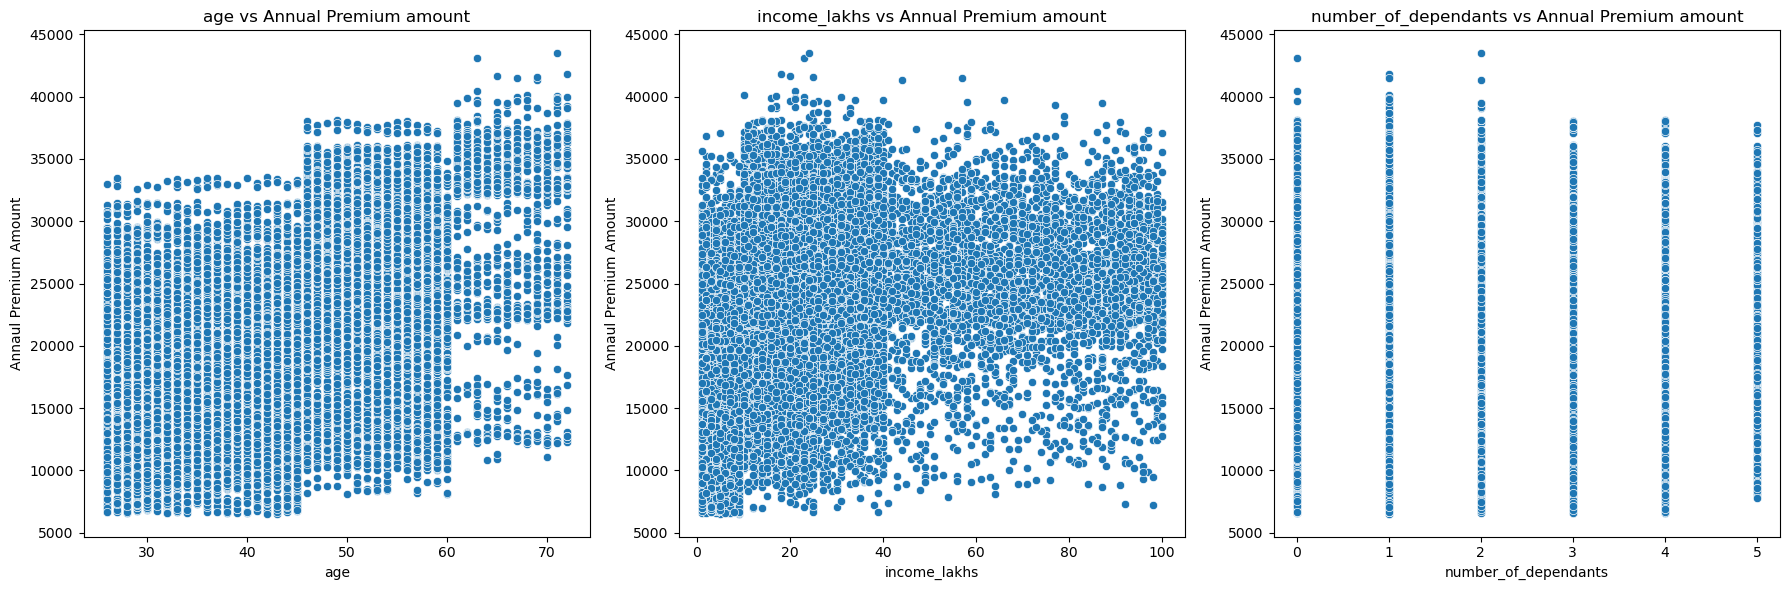

In [95]:
numeric_features = ['age', 'income_lakhs', 'number_of_dependants']

fig, axes  = plt.subplots(1, len(numeric_features), figsize = (18,6))

for ax, column in zip(axes, numeric_features):
    sns.scatterplot(x = df2[column], y = df2['annual_premium_amount'],ax = ax)
    ax.set_title(f'{column} vs Annual Premium amount')
    ax.set_xlabel(column)
    ax.set_ylabel('Annaul Premium Amount')

plt.tight_layout()
plt.show()

In [96]:
categorical_columns = df2.select_dtypes(include=['object', 'category'])
categorical_columns.columns

Index(['gender', 'region', 'marital_status', 'bmi_category', 'smoking_status',
       'employment_status', 'income_level', 'medical_history',
       'insurance_plan'],
      dtype='object')

In [97]:
for col in categorical_columns:
    print(f"Unique values in '{col}': {df[col].unique()}")

Unique values in 'gender': ['Male' 'Female']
Unique values in 'region': ['Northwest' 'Southeast' 'Northeast' 'Southwest']
Unique values in 'marital_status': ['Unmarried' 'Married']
Unique values in 'bmi_category': ['Normal' 'Obesity' 'Overweight' 'Underweight']
Unique values in 'smoking_status': ['No Smoking' 'Regular' 'Occasional' 'Does Not Smoke' 'Not Smoking'
 'Smoking=0']
Unique values in 'employment_status': ['Salaried' 'Self-Employed' 'Freelancer']
Unique values in 'income_level': ['<10L' '10L - 25L' '> 40L' '25L - 40L']
Unique values in 'medical_history': ['Diabetes' 'High blood pressure' 'No Disease'
 'Diabetes & High blood pressure' 'Thyroid' 'Heart disease'
 'High blood pressure & Heart disease' 'Diabetes & Thyroid'
 'Diabetes & Heart disease']
Unique values in 'insurance_plan': ['Bronze' 'Silver' 'Gold']


In [98]:
df2['smoking_status'].replace({
    'Smoking=0': 'No Smoking',
    'Does Not Smoke' : 'No Smoking',
    'Not Smoking' : 'No Smoking'
  },inplace = True)
df2['smoking_status'].unique()

C:\Users\mohsi\AppData\Local\Temp\ipykernel_5620\2802896140.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['smoking_status'].replace({


array(['No Smoking', 'Regular', 'Occasional'], dtype=object)

In [99]:
pctg_count = df2['gender'].value_counts(normalize = True)
pctg_count

gender
Male      0.549125
Female    0.450875
Name: proportion, dtype: float64

<Axes: xlabel='gender'>

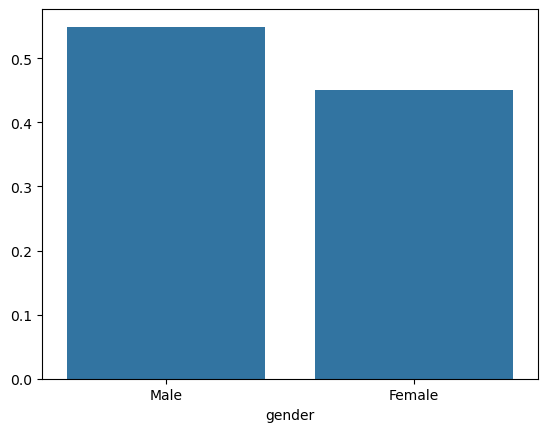

In [100]:
sns.barplot(x = pctg_count.index, y = pctg_count.values)

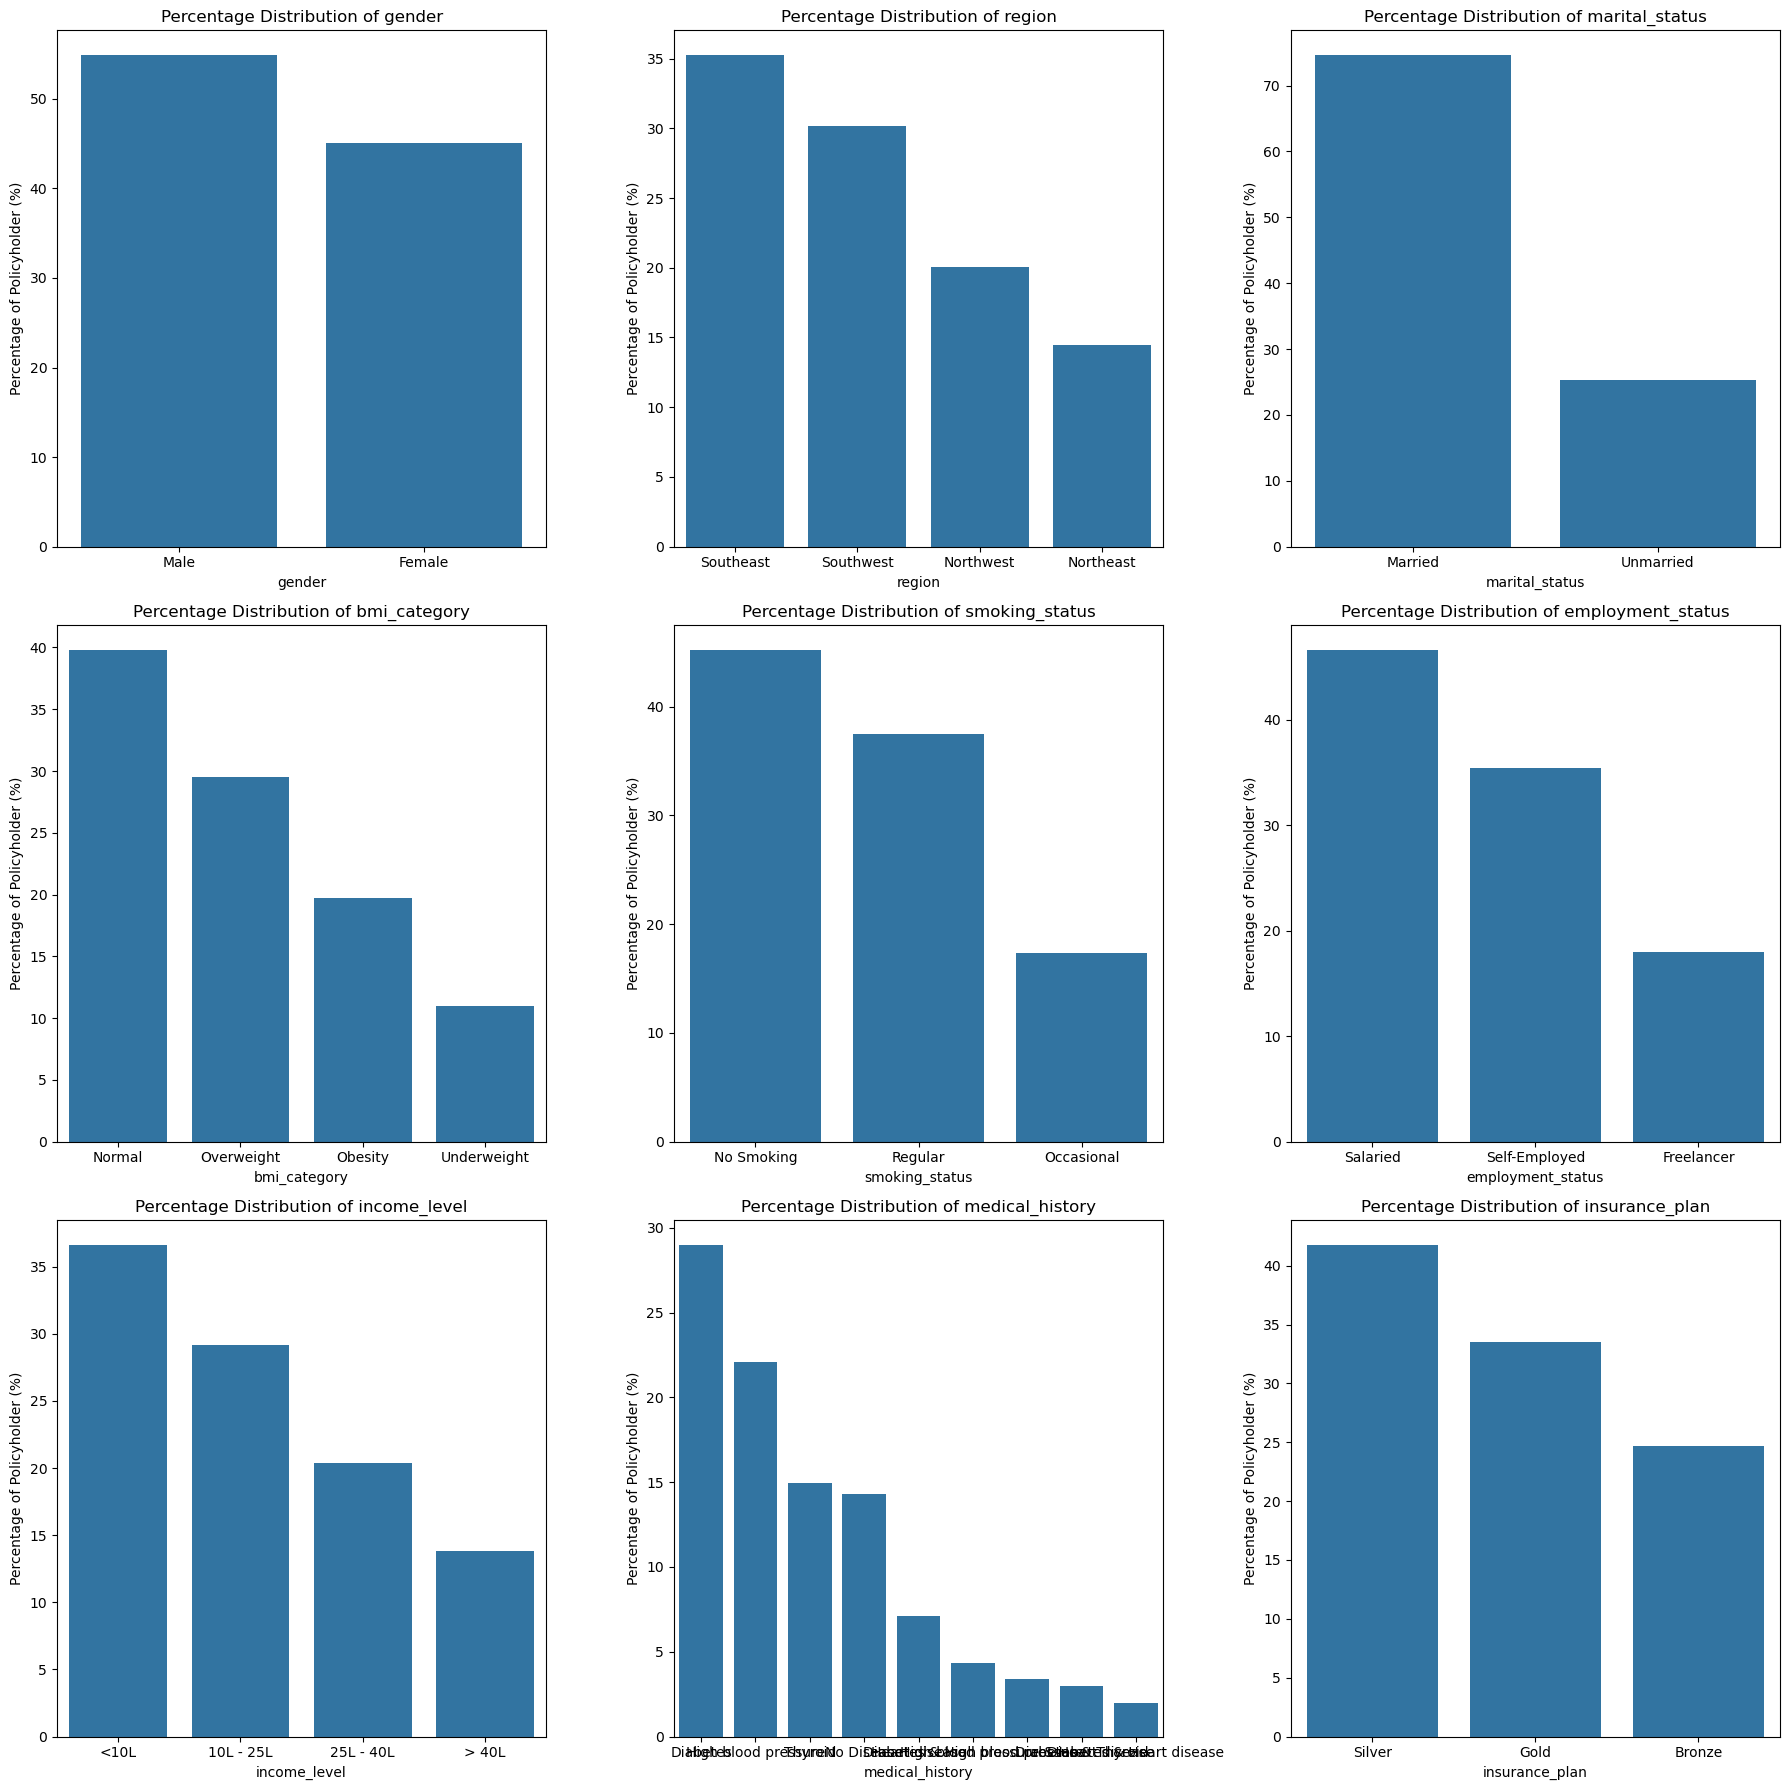

In [101]:
fig, axes  = plt.subplots(3, 3,figsize = (18,18))
axes  = axes.flatten()

for ax , column in zip(axes , categorical_columns):
    category_counts = df2[column].value_counts(normalize = True) * 100
    sns.barplot(x =category_counts.index , y = category_counts.values, ax = ax)
    ax.set_title(f'Percentage Distribution of {column}')
    ax.set_ylabel('Percentage of Policyholder (%)')
    ax.set_xlabel(column)
plt.tight_layout()
plt.show()


insurance_plan  Bronze  Gold  Silver
income_level                        
10L - 25L          799  3554    4354
25L - 40L          301  2631    3142
<10L              6054   527    4341
> 40L              214  3287     618


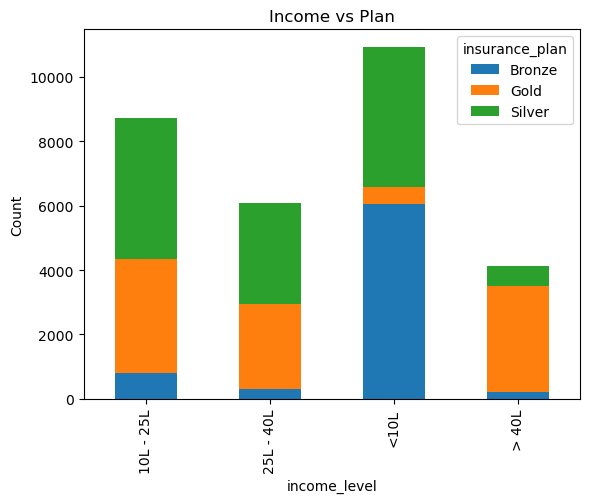

In [102]:
crosstab = pd.crosstab(df2['income_level'], df2['insurance_plan'])
print(crosstab)

crosstab.plot(kind = "bar", stacked = True )
plt.title('Income vs Plan')
plt.ylabel('Count')
plt.show()

## Feature Engineering

In [103]:
df2.head(2)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339


In [104]:
df2.medical_history.unique()

array(['Diabetes', 'High blood pressure', 'No Disease',
       'Diabetes & High blood pressure', 'Thyroid', 'Heart disease',
       'High blood pressure & Heart disease', 'Diabetes & Thyroid',
       'Diabetes & Heart disease'], dtype=object)

In [105]:
# According Medical hostory column having Kind of Diseases, we will have to convert these diseases into numbers
# If the person will have higher number of diseases premier will be higher 
# So we will assgin some risk score according to business told us

risk_score = {
    "diabetes":6,
    "heart disease":8,
    "high blood pressure": 6,
    "thyroid": 5,
    "no disease": 0,
    "none": 0
}

# We have to seperate out the multiple diseases 
# if the person will have multiple diseases his risk score will sum 

df2[['disease1', 'disease2']] = df2['medical_history'].str.split(" & ", expand = True ).apply(lambda x : x.str.lower())
df2.head()

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053,diabetes,None
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339,diabetes,None
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164,high blood pressure,None
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,Gold,20303,no disease,None
4,56,Male,Northeast,Married,3,Obesity,Occasional,Self-Employed,10L - 25L,14,Diabetes,Bronze,15610,diabetes,None


In [106]:
df2['disease1'].fillna('none', inplace = True)
df2['disease2'].fillna('none', inplace = True)
df2['total_risk_score'] = 0

for disease in ['disease1','disease2']:
    df2['total_risk_score'] += df2[disease].map(risk_score)
    
max_score = df2['total_risk_score'].max()
min_score = df2['total_risk_score'].min()
df2['normalized_risk_score'] = (df2['total_risk_score'] - min_score) / (max_score - min_score)
df2.head(2)

C:\Users\mohsi\AppData\Local\Temp\ipykernel_5620\1294052834.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['disease1'].fillna('none', inplace = True)
C:\Users\mohsi\AppData\Local\Temp\ipykernel_5620\1294052834.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2,total_risk_score,normalized_risk_score
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053,diabetes,none,6,0.428571
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339,diabetes,none,6,0.428571


In [107]:
df2.insurance_plan.unique()

array(['Bronze', 'Silver', 'Gold'], dtype=object)

In [108]:
df2['income_level'].unique() 

array(['<10L', '10L - 25L', '> 40L', '25L - 40L'], dtype=object)

In [109]:
# This is an ordinal Category like Bronze < Silver < Gold  So will just Label Encoding
df2['insurance_plan'] = df2['insurance_plan'].map({'Bronze':1, 'Silver':2, 'Gold':3})
df2.insurance_plan.unique()

array([1, 2, 3], dtype=int64)

In [110]:
df2['income_level'] = df2['income_level'].map({'<10L':1, '10L - 25L':2, '> 40L':3, '25L - 40L':4})
df2.head(3)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2,total_risk_score,normalized_risk_score
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,1,6,Diabetes,1,9053,diabetes,none,6,0.428571
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,1,6,Diabetes,1,16339,diabetes,none,6,0.428571
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,2,20,High blood pressure,2,18164,high blood pressure,none,6,0.428571


#### So Remaining Column are nominal So we will OneHotEncoding On those

In [111]:
nominal_cols = ['gender', 'region', 'marital_status','bmi_category', 'smoking_status','employment_status']
df3 = pd.get_dummies(df2, columns = nominal_cols, drop_first = True, dtype = int)
df3.head()

,age,number_of_dependants,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2,total_risk_score,...,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,26,0,1,6,Diabetes,1,9053,diabetes,none,6,...,0,0,1,0,0,0,0,0,1,0
1,29,2,1,6,Diabetes,1,16339,diabetes,none,6,...,1,0,0,1,0,0,0,1,1,0
2,49,2,2,20,High blood pressure,2,18164,high blood pressure,none,6,...,0,0,0,0,0,0,0,0,0,1
3,30,3,3,77,No Disease,3,20303,no disease,none,0,...,1,0,0,0,0,0,0,0,1,0
4,56,3,2,14,Diabetes,1,15610,diabetes,none,6,...,0,0,0,1,0,0,1,0,0,1


In [112]:
df4 = df3.drop(['medical_history', 'disease1', 'disease2'],axis = 1)
df4.head()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,annual_premium_amount,total_risk_score,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,26,0,1,6,1,9053,6,0.428571,1,1,0,0,1,0,0,0,0,0,1,0
1,29,2,1,6,1,16339,6,0.428571,0,0,1,0,0,1,0,0,0,1,1,0
2,49,2,2,20,2,18164,6,0.428571,0,0,0,0,0,0,0,0,0,0,0,1
3,30,3,3,77,3,20303,0,0.000000,0,0,1,0,0,0,0,0,0,0,1,0
4,56,3,2,14,1,15610,6,0.428571,1,0,0,0,0,1,0,0,1,0,0,1


#### Some Co-Relation Analysis between some columns

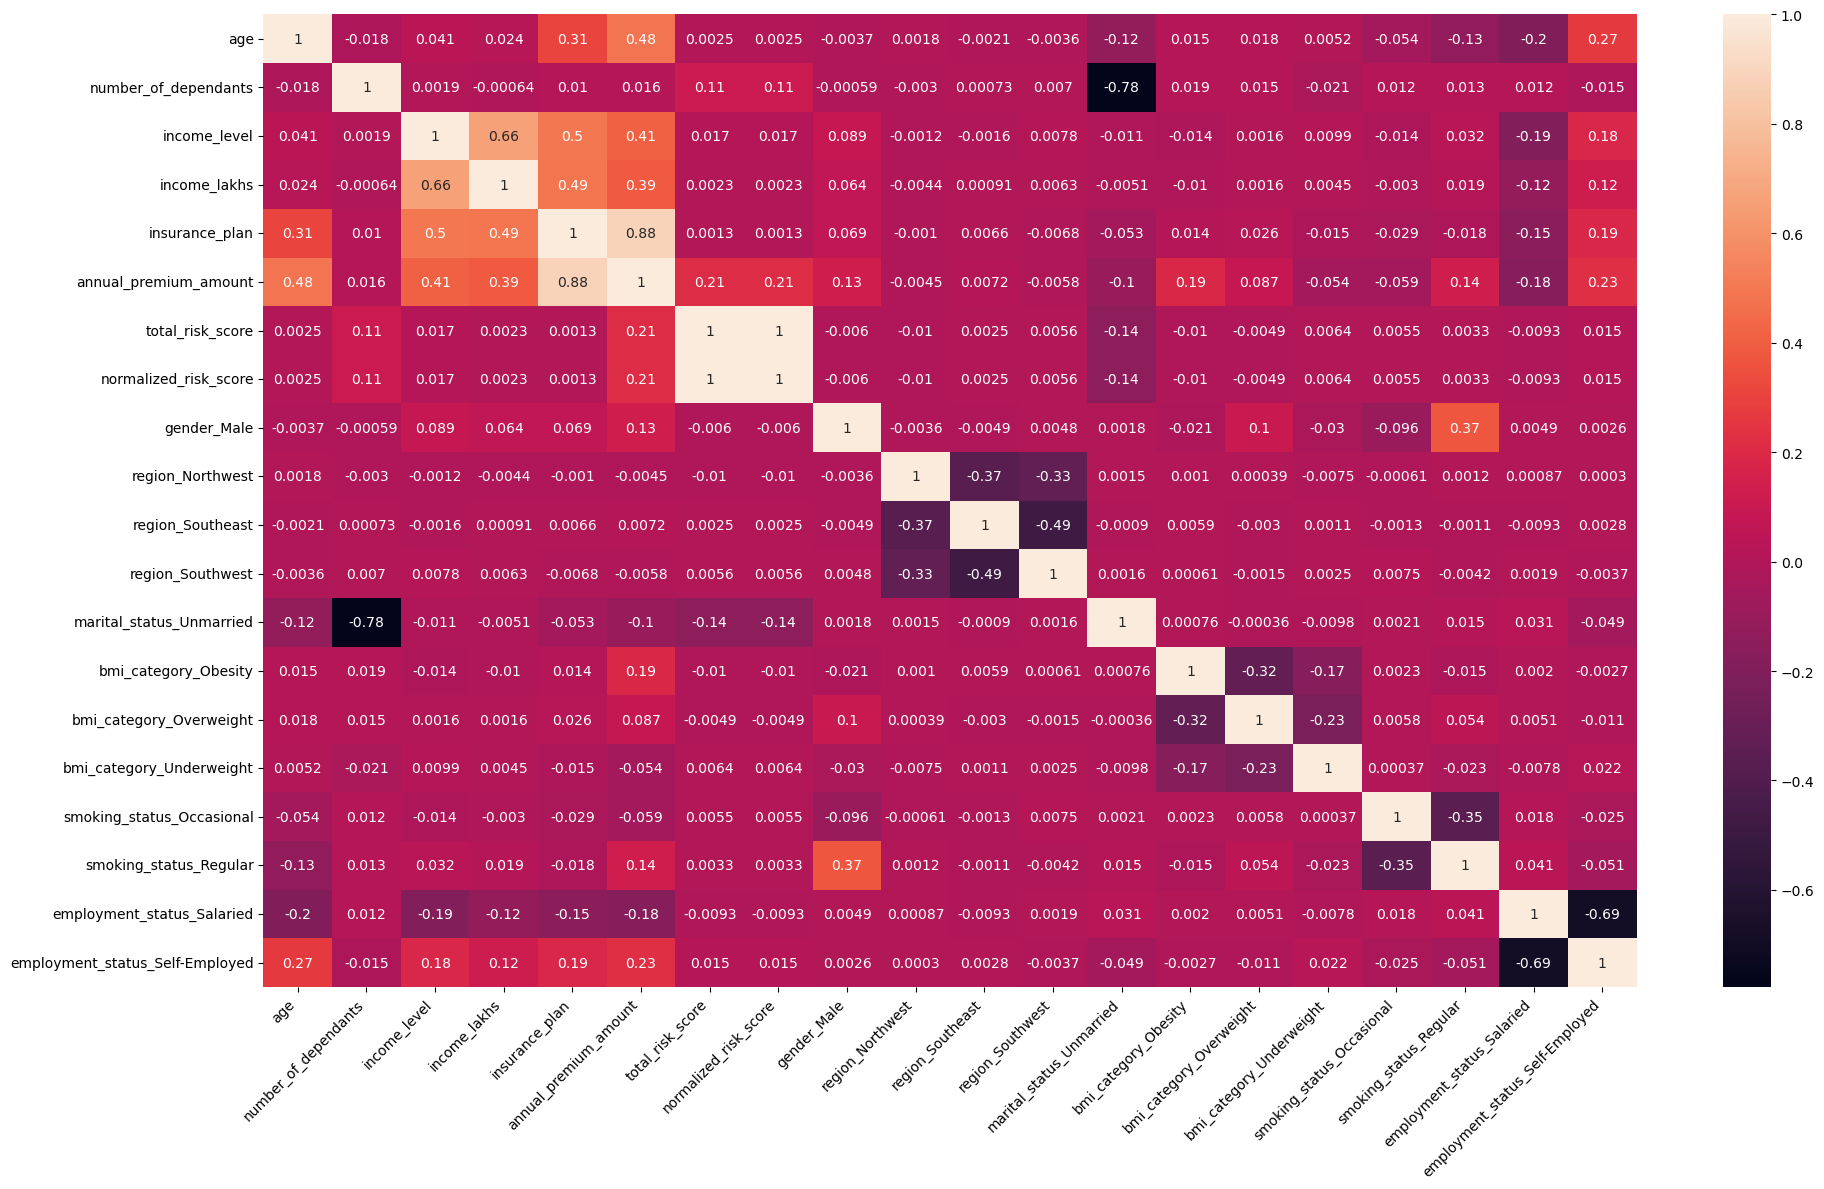

In [113]:
cm = df4.corr()

plt.figure(figsize = (20,12))
sns.heatmap(cm, annot = True)
plt.xticks(rotation = 45, ha = 'right')
plt.yticks(rotation = 0)
plt.tight_layout()
plt.show()

#### Feature selection Based on Co-Relation

In [114]:
X = df4.drop('annual_premium_amount', axis = 'columns')
y = df4['annual_premium_amount']

from sklearn.preprocessing import MinMaxScaler
cols_to_scale = ['age', 'number_of_dependants', 'income_level', 'income_lakhs', 'insurance_plan']
scaler = MinMaxScaler()

X[cols_to_scale] = scaler.fit_transform(X[cols_to_scale])
X.describe()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,total_risk_score,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
count,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000
mean,0.371628,0.477547,0.393077,0.224509,0.544112,5.969217,0.426373,0.549125,0.200691,0.352693,0.301992,0.253336,0.196835,0.295051,0.110087,0.173228,0.374656,0.466132,0.354269
std,0.240053,0.284129,0.378150,0.226822,0.379009,3.361170,0.240084,0.497589,0.400524,0.477816,0.459129,0.434929,0.397613,0.456073,0.313003,0.378450,0.484042,0.498860,0.478299
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.173913,0.200000,0.000000,0.060606,0.500000,5.000000,0.357143,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.347826,0.600000,0.333333,0.161616,0.500000,6.000000,0.428571,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.565217,0.600000,0.666667,0.313131,1.000000,6.000000,0.428571,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,14.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [115]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data):
    vif_df = pd.DataFrame()
    vif_df['Column'] = data.columns
    vif_df['VIF'] = [variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
    return vif_df

In [116]:
calculate_vif(X)

C:\Users\mohsi\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,Column,VIF
0,age,3.882319
1,number_of_dependants,6.292550
2,income_level,4.104266
3,income_lakhs,3.797992
4,insurance_plan,4.931114
5,total_risk_score,inf
6,normalized_risk_score,inf
7,gender_Male,2.599039
8,region_Northwest,2.124859
9,region_Southeast,2.981854


In [117]:
X_reduced = X.drop('income_level', axis = 'columns')
X_reduced.head()

,age,number_of_dependants,income_lakhs,insurance_plan,total_risk_score,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,0.000000,0.0,0.050505,0.0,6,0.428571,1,1,0,0,1,0,0,0,0,0,1,0
1,0.065217,0.4,0.050505,0.0,6,0.428571,0,0,1,0,0,1,0,0,0,1,1,0
2,0.500000,0.4,0.191919,0.5,6,0.428571,0,0,0,0,0,0,0,0,0,0,0,1
3,0.086957,0.6,0.767677,1.0,0,0.000000,0,0,1,0,0,0,0,0,0,0,1,0
4,0.652174,0.6,0.131313,0.0,6,0.428571,1,0,0,0,0,1,0,0,1,0,0,1


In [118]:
### Now We will Start model training, Our Data is ready for Training model

## Model Training

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y , test_size=0.3, random_state=10)
print("x train: ", X_train.shape)
print("X test: " ,X_test.shape)
print("y train: ",y_train.shape)
print("y test: ", y_test.shape)

x train:  (20875, 18)
X test:  (8947, 18)
y train:  (20875,)
y test:  (8947,)


## Applying Linear Regression

In [120]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
model_lr.score(X_test, y_test)

0.9538448451629948

In [121]:
#Checking both train and test score whether over model may getting overfitting
# If both the score will same then model will overfitting free 
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
train_score = model_lr.score(X_train, y_train)
test_score = model_lr.score(X_test, y_test)

train_score, test_score

(0.9534163989489616, 0.9538448451629948)

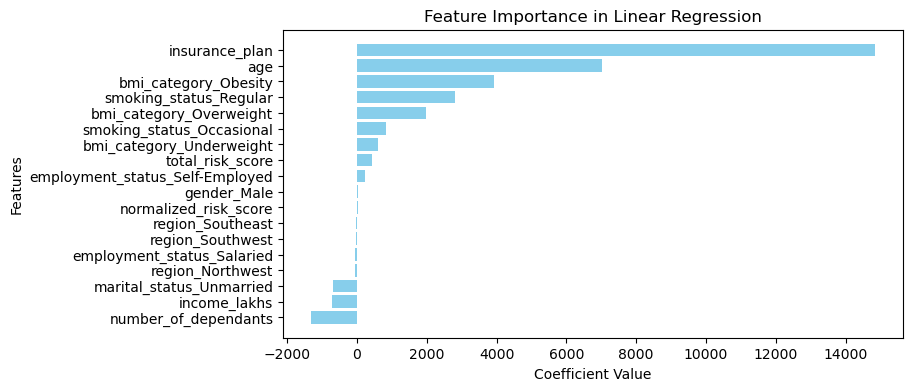

In [122]:
# By checking Feature impotance we will see how every feature have weight in prediction
feature_importance = model_lr.coef_
coef_df  = pd.DataFrame(feature_importance, index = X_test.columns, columns = ['Coefficients'])
coef_df = coef_df.sort_values(by = 'Coefficients', ascending = True)

plt.figure(figsize=(8, 4))
plt.barh(coef_df.index, coef_df['Coefficients'], color='skyblue')
plt.xlabel("Coefficient Value")
plt.ylabel("Features")
plt.title("Feature Importance in Linear Regression")
plt.show()

In [123]:
from sklearn.linear_model import Ridge

# Initialize the Ridge model
model_ridge = Ridge(alpha=1.0)  # alpha is the regularization strength

# Fit the model
model_ridge.fit(X_train, y_train)

# Calculate scores
train_score_ridge = model_ridge.score(X_train, y_train)
test_score_ridge = model_ridge.score(X_test, y_test)

train_score_ridge, test_score_ridge

(0.9534162648364555, 0.9538444434908097)

In [124]:
from sklearn.linear_model import Lasso

# Initialize the Lasso model
model_lasso = Lasso(alpha=1.0)  # alpha is the regularization strength

# Fit the model
model_lasso.fit(X_train, y_train)

# Calculate scores
train_score_lasso = model_lasso.score(X_train, y_train)
test_score_lasso = model_lasso.score(X_test, y_test)

train_score_lasso, test_score_lasso

(0.9534112985304811, 0.9538372027160428)

In [125]:
!pip install xgboost

In [126]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the XGBRegressor model
model_xgb = XGBRegressor(
    objective='reg:squarederror',  # Objective function for regression
    n_estimators=100,              # Number of boosting rounds (trees)
    learning_rate=0.1,             # Learning rate
    max_depth=3,                   # Maximum depth of a tree
    subsample=0.8,                 # Fraction of samples used for training each tree
    colsample_bytree=0.8,          # Fraction of features used for training each tree
    random_state=42                # Random seed for reproducibility
)

# Fit the model
model_xgb.fit(X_train, y_train)

# Predict on training and test data
y_train_pred = model_xgb.predict(X_train)
y_test_pred = model_xgb.predict(X_test)

# Evaluate the model
train_score = r2_score(y_train, y_train_pred)
test_score = r2_score(y_test, y_test_pred)

train_score, test_score

(0.9973099231719971, 0.9972321391105652)

In [127]:
y_pred = model_xgb.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred)
rmse_lr = np.sqrt(mse_lr)

print("XGBoost Regression ===> MSE: ", mse_lr, rmse_lr )

XGBoost Regression ===> MSE:  130962.52712780387 361.8874509123021


In [128]:
from sklearn.model_selection import RandomizedSearchCV

model_xgb = XGBRegressor()

param_grid = {
    'n_estimators': [20,40,50],
    'learning_rate': [0.01,0.1,0.2],
    'max_depth': [3,4,5]
}

random_search = RandomizedSearchCV(model_xgb, param_grid, n_iter = 10, cv = 3, scoring = 'r2', random_state=42)

random_search.fit(X_train, y_train)
random_search.best_score_

0.9970577955245972

In [129]:
random_search.best_params_

{'n_estimators': 50, 'max_depth': 5, 'learning_rate': 0.1}

In [130]:
best_model  = random_search.best_estimator_

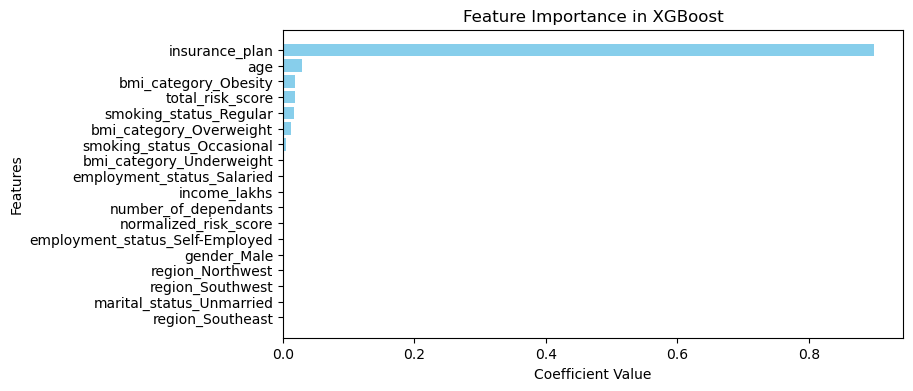

In [131]:
# By checking Feature impotance we will see how every feature have weight in prediction
feature_importances = best_model.feature_importances_
coef_df  = pd.DataFrame(feature_importances, index = X_test.columns, columns = ['Coefficients'])
coef_df = coef_df.sort_values(by = 'Coefficients', ascending = True)

plt.figure(figsize=(8, 4))
plt.barh(coef_df.index, coef_df['Coefficients'], color='skyblue')
plt.xlabel("Coefficient Value")
plt.ylabel("Features")
plt.title("Feature Importance in XGBoost")
plt.show()

## Error Analysis

In [132]:
y_pred = best_model.predict(X_test)

residual = y_pred - y_test
residual_pct = residual*100/ y_test

results_df = pd.DataFrame({
    'actual': y_test,
    'predicted': y_pred,
    'difference': residual,
    'diff_pct': residual_pct
})

results_df.head()

,actual,predicted,difference,diff_pct
19713,26895,26691.470703,-203.529297,-0.756755
14750,22734,22650.751953,-83.248047,-0.366183
19932,21198,21581.894531,383.894531,1.810994
29643,9100,9425.934570,325.934570,3.581699
17076,26434,26691.470703,257.470703,0.974013


<Axes: xlabel='diff_pct', ylabel='Count'>

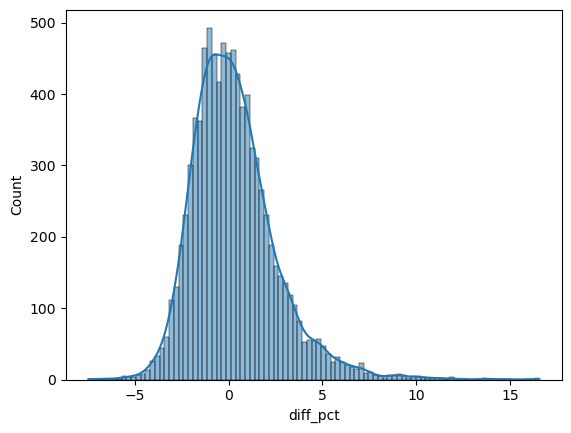

In [133]:
sns.histplot(results_df['diff_pct'], kde = True)

In [134]:
# Checking how much Records having Error more than 10% 

extreme_error_threshold = 10

extreme_results_df = results_df[np.abs(results_df.diff_pct)>extreme_error_threshold]
extreme_results_df.shape

(29, 4)

In [135]:
extreme_error_pct = extreme_results_df.shape[0]*100/results_df.shape[0]
extreme_error_pct

0.32413099362914943

In [136]:
results_df[np.abs(results_df.diff_pct)>50].sort_values('diff_pct', ascending=False)

,actual,predicted,difference,diff_pct


In [137]:
X_test.index

Index([19713, 14750, 19932, 29643, 17076, 20314, 24893, 26722, 25844, 10731,
       ...
       10637,  1224, 17046, 19228,  9275,  3387,  7858,  9744,  4849,  8986],
      dtype='int64', length=8947)

In [138]:
extreme_results_df.index

Index([14286, 27518,  9285,  7547, 21910, 12189, 21141, 16263,  8216, 13973,
        9150, 24145, 18522,  6163, 18681, 19145, 21455, 22666,  7508, 10741,
        6517, 18834, 13744, 24119,  2695, 25658, 11019, 14037,  7654],
      dtype='int64')

In [139]:
extreme_error_df = X_test.loc[extreme_results_df.index]

In [140]:
extreme_error_df.head()

,age,number_of_dependants,income_lakhs,insurance_plan,total_risk_score,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
14286,0.021739,0.6,0.050505,0.0,0,0.000000,1,1,0,0,1,0,0,0,0,0,1,0
27518,0.304348,0.6,0.080808,0.0,5,0.357143,1,1,0,0,0,0,0,0,0,0,0,1
9285,0.326087,0.6,0.010101,0.0,0,0.000000,0,0,1,0,0,0,0,0,0,0,1,0
7547,0.347826,0.2,0.080808,0.0,0,0.000000,1,0,1,0,1,0,0,0,0,0,1,0
21910,0.043478,0.6,0.020202,0.0,0,0.000000,1,0,1,0,0,0,0,0,0,0,0,0


<Axes: xlabel='income_lakhs', ylabel='Count'>

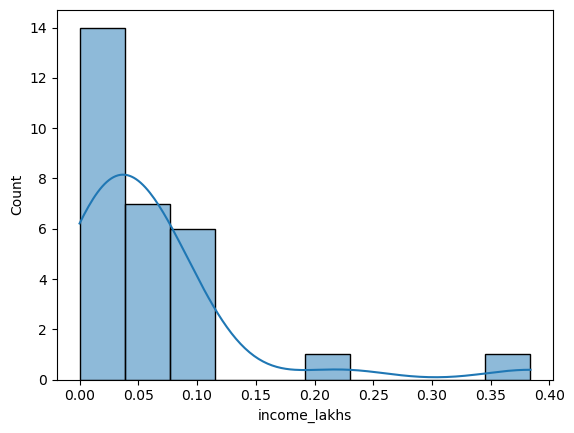

In [141]:
sns.histplot(extreme_error_df.income_lakhs, kde= True)

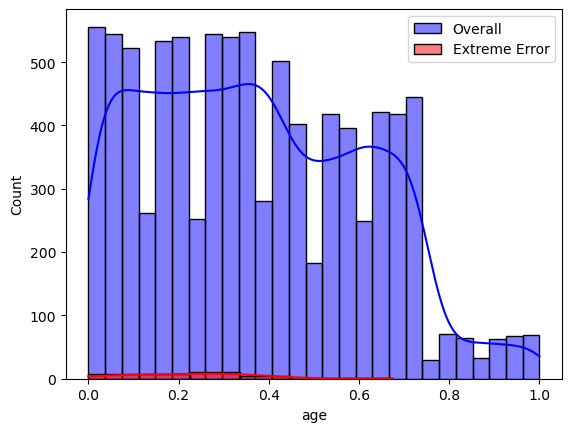

In [142]:
sns.histplot(X_test.age,label= "Overall", color = "blue",  kde= True)
sns.histplot(extreme_error_df.age,label= "Extreme Error",color = "red", kde= True)
plt.legend()
plt.show()

In [143]:
# for feature in X.columns:
#     plt.figure(figsize = (10,4))
#     sns.histplot(X_test[feature],label= "Overall",color = 'red',kde= True)
#     sns.histplot(extreme_error_df[feature],label="Extreme Error", alpha = 0.5,color = 'blue', kde= True)
#     plt.title(f'Distribution of {feature} for Extreme Error vs Overall')
#     plt.legend()
#     plt.show()

In [144]:
df_reversed = pd.DataFrame()
df_reversed[cols_to_scale] = scaler.inverse_transform(extreme_error_df[cols_to_scale])
df_reversed.head()

KeyError: "['income_level'] not in index"

In [ ]:
sns.histplot(df_reversed['age'])

In [ ]:
df_reversed.describe()

## Model Segmentation